In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Churn_Modelling - Train.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(8194, 14)

In [4]:
data["RowNumber"].value_counts()

1       1
6146    1
5472    1
5471    1
5470    1
       ..
2727    1
2726    1
2725    1
2724    1
8194    1
Name: RowNumber, Length: 8194, dtype: int64

Dataset Information -

RowNumber - The number of the row

CustomerId - identity number

Surname - last name

CreditScore - Credit Score

Geography - Country or region

Gender - Male or female

Age - customer age

Tenure - Tenure

Balance - Amount in account

NumOfProducts - Number Of Bank Products customer have

HasCrCard - Has Credit card

IsActiveMember - active with different functionalities with bank like programs

,bonds,insurance etc.

EstimatedSalary - salary estimated by bank

Exited - withdrawal from bank


1. Fill the null value with the mode of that column in the training dataset and testing
dataset.


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            1
CreditScore        0
Geography          0
Gender             1
Age                0
Tenure             0
Balance            2
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


CustomerID and Surname is not required for model building let's drop it

In [8]:
# let's make a copy of original dataset
df = data.copy()


In [9]:
df = df.drop(["CustomerId","Surname"] , axis = 1)
df

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8189,8190,521,France,Female,77,6,0.00,2,1,1,49054.10,0
8190,8191,684,Germany,Female,56,3,127585.98,3,1,1,80593.49,1
8191,8192,795,France,Female,40,2,101891.10,1,1,1,183044.86,0
8192,8193,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0


In [10]:
# Row number also nut required
df = df.drop(["RowNumber"] , axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
8189,521,France,Female,77,6,0.00,2,1,1,49054.10,0
8190,684,Germany,Female,56,3,127585.98,3,1,1,80593.49,1
8191,795,France,Female,40,2,101891.10,1,1,1,183044.86,0
8192,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0


In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             1
Age                0
Tenure             0
Balance            2
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [13]:
df["Balance"] = df["Balance"].fillna(df["Balance"].median())

In [14]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# unique value in feature feature
for i in ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]:
    print(df[i].value_counts())

France     4072
Germany    2070
Spain      2052
Name: Geography, dtype: int64
Male      4485
Female    3709
Name: Gender, dtype: int64
1     860
2     859
7     849
8     842
5     829
3     813
4     804
9     802
6     789
10    403
0     344
Name: Tenure, dtype: int64
1    4146
2    3775
3     223
4      50
Name: NumOfProducts, dtype: int64
1    5797
0    2397
Name: HasCrCard, dtype: int64
1    4218
0    3976
Name: IsActiveMember, dtype: int64
0    6511
1    1683
Name: Exited, dtype: int64


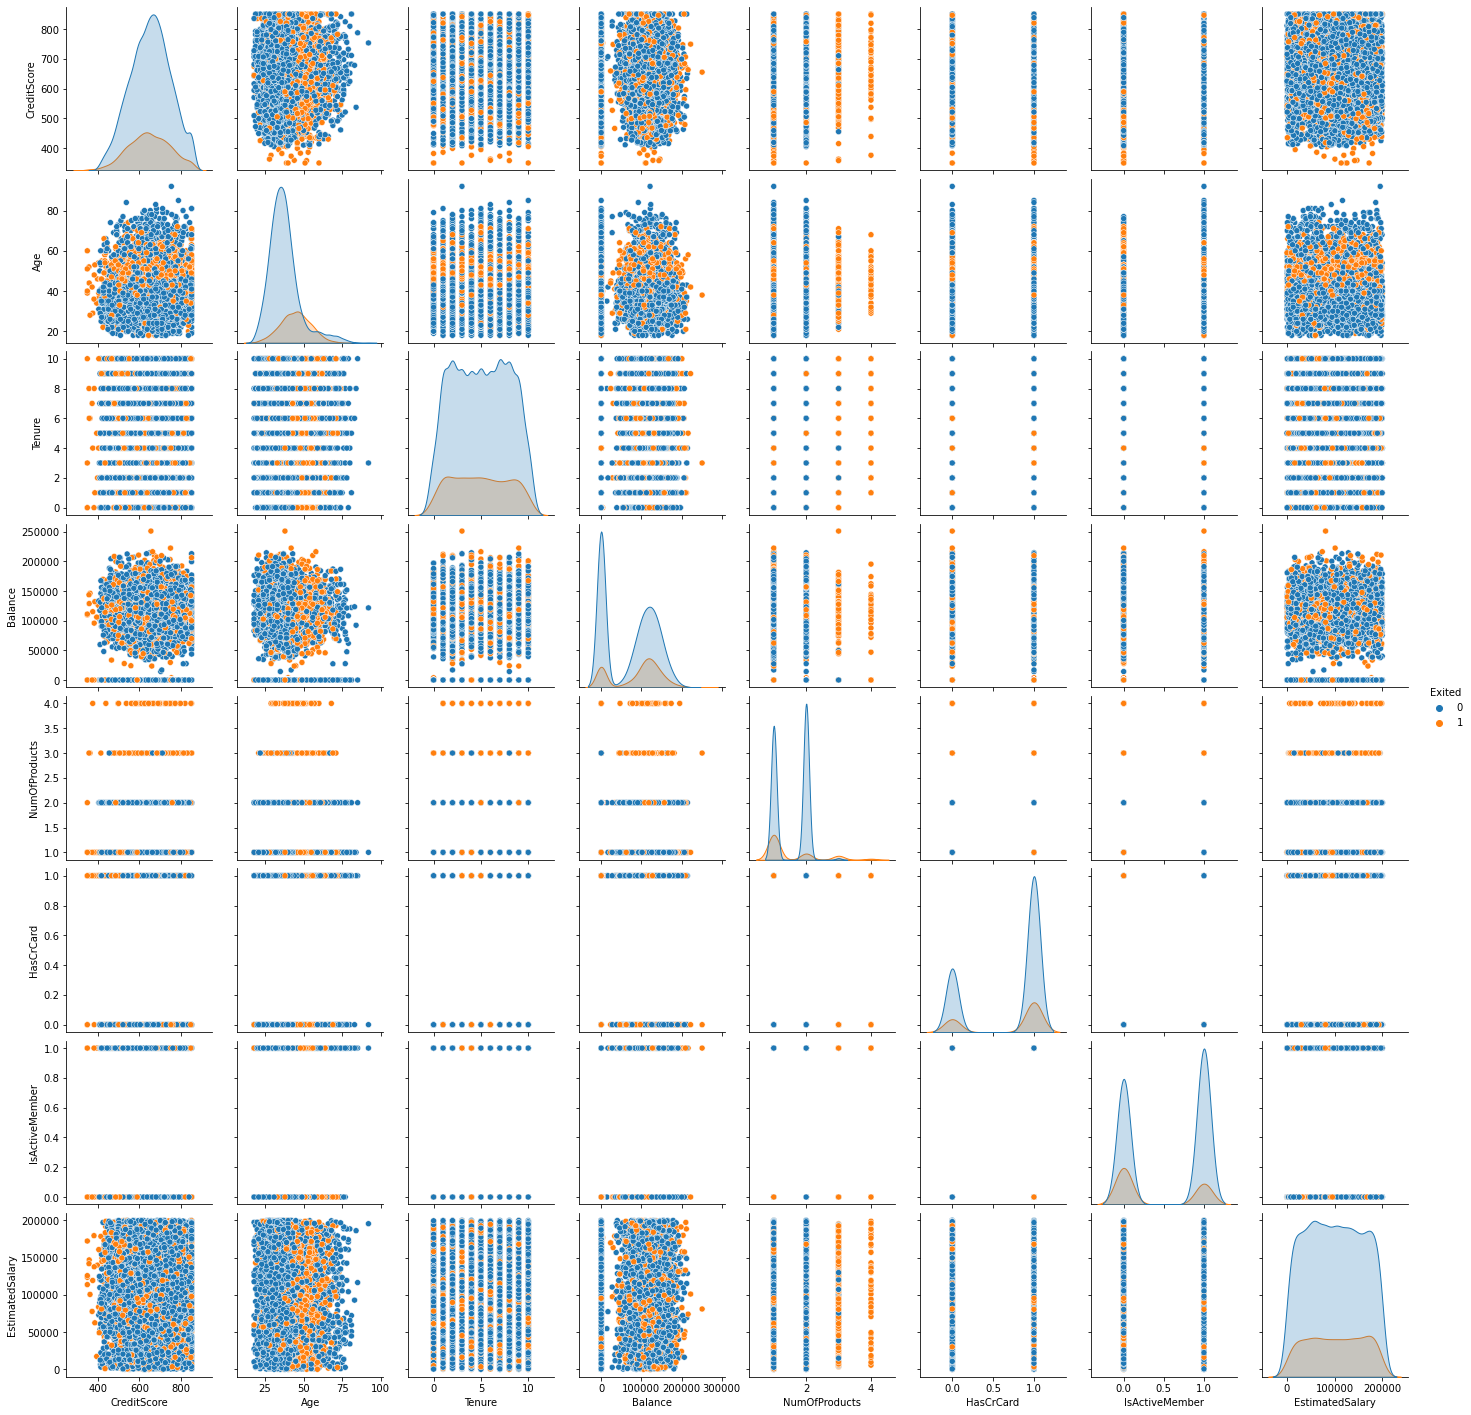

In [16]:
sns.pairplot(df , hue = "Exited")

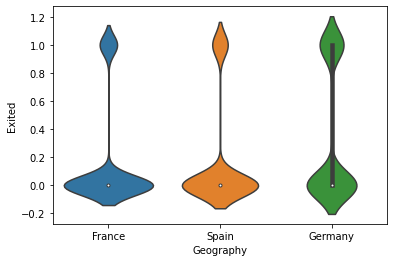

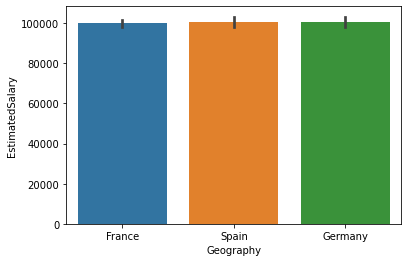

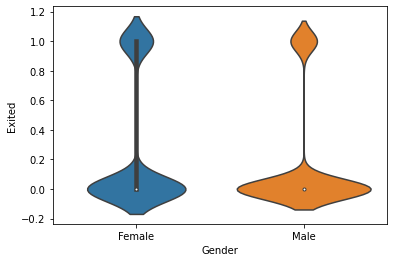

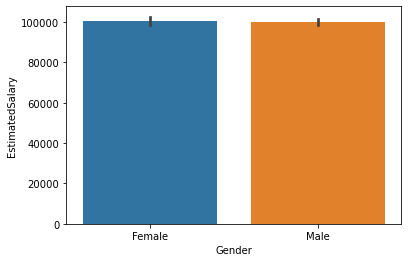

In [17]:
for i in ["Geography","Gender"]:
    plt.figure()
    sns.violinplot(x = df[i] , y = df["Exited"])
    plt.figure()
    sns.barplot(x = df[i] , y = df["EstimatedSalary"])

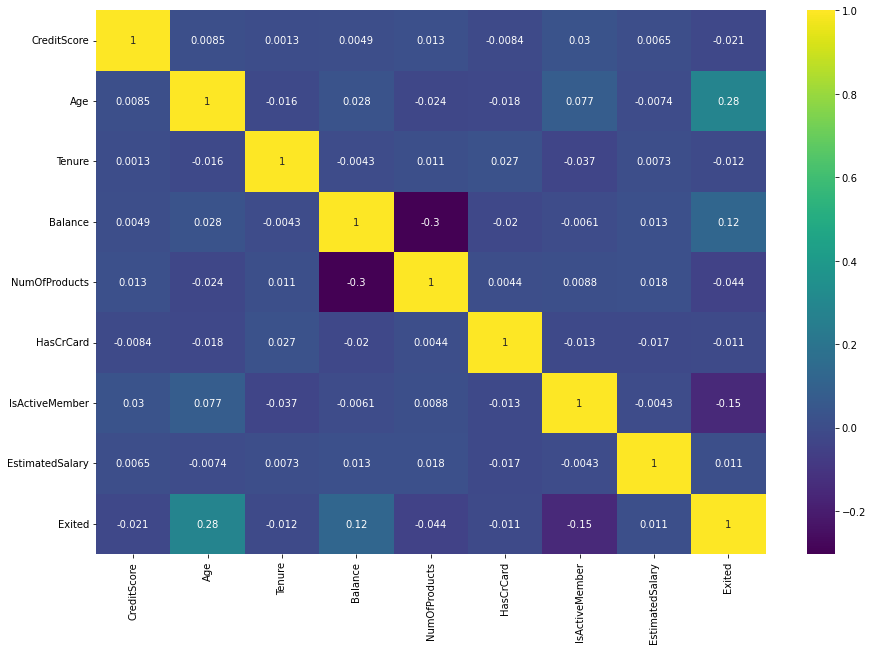

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True , cmap = "viridis")
plt.show()

In [19]:
# multicolinearity
def colinearity(df,theresold):
    cols = []
    corr_mat = df.corr()
    columns = corr_mat.columns
    for i in range(len(columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>theresold:
                cols.append(columns[i])
    return cols
                

In [20]:
colinearity(df.drop(["EstimatedSalary","Exited"],axis=1),0.2)

['NumOfProducts']

there is no multicolineaity only feature have corelation is greater than 0.2 in independent feature

Age

is active member 

highly corelated compared to other feature with target features

Scaling the categorical columns

One hot encoding

In [21]:
for i in ["Geography","Gender"]:
    df = pd.get_dummies(data=df , columns = [i],drop_first = 1)

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


5. Create a linear regression model from the above-given dataset that can predict the
Estimated Salary. Don’t use Exited column in model creation. Print the coefficient,
Intercept, training accuracy, and testing accuracy

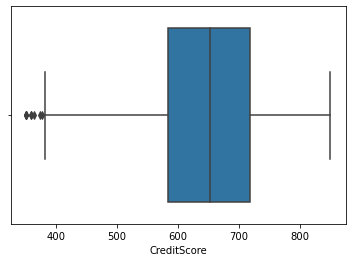

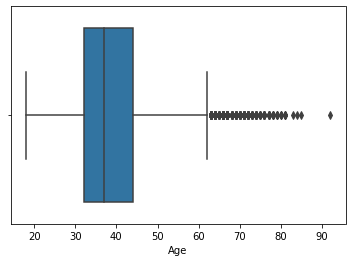

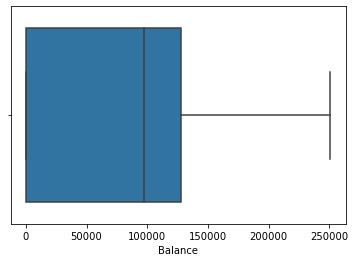

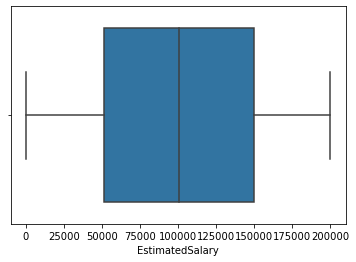

In [23]:

for i in ["CreditScore","Age","Balance","EstimatedSalary"]:
    plt.figure()
    sns.boxplot(x = df[i])

In [24]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
IQR = q3-q1
df = df[(df["Age"]>(q1-1.5*IQR)) & (df["Age"]<(q3+1.5*IQR)) ]

In [25]:
X = df.drop(["EstimatedSalary","Exited"] , axis = 1)
Y = df[["EstimatedSalary"]]

In [26]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                random_state = 42)

In [27]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train , Y_train)

LinearRegression()

In [29]:
# coefficient
le.coef_

array([[ 315.3250708 , -114.48659829,    8.4077749 ,  978.27413943,
         816.32002448,  -91.62349836, -447.41855965,   79.14762213,
         -34.02905496, -541.17293336]])

In [30]:
le.intercept_

array([100211.27549372])

Testing accuracy

In [31]:
Y_pred = le.predict(X_test)
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.0003009582388920906

Training accuracy

In [32]:
Y_pred = le.predict(X_train)
from sklearn import metrics
metrics.r2_score(Y_pred,Y_train)

-1794.7989411656717

In [33]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X,Y,test_size = 0.2,
                                                random_state = 42)

In [34]:
Y_pred = le.predict(X_test)
Y_pred

array([[ 98979.83139648],
       [100486.79556807],
       [100540.25829051],
       ...,
       [101170.15223477],
       [ 99237.42625205],
       [ 98731.22320558]])

6. Create a function that will return values High when Estimated Salary is more than
100000, Medium Estimated Salary greater than 50000 and less than 100000, and
Low as an output. With the help of this function count the number of people in the
High, Low, and Medium classes in the above-created Linear Regression model test
dataset predicted Estimated Salary.


In [35]:
X_test_1["Predicted Salary"] = Y_pred

In [36]:
X_test_1["Status"] = ["High" if (x>100000) else "Medium" if (x>50000 and x<100000) else "Low" for x in X_test_1["Predicted Salary"]] 

In [37]:
X_test_1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,Predicted Salary,Status
1288,611,46,5,0.00,1,1,0,0,0,0,98979.831396,Medium
1455,663,32,8,130627.66,1,1,0,1,0,1,100486.795568,High
2681,604,34,7,0.00,2,1,0,0,0,0,100540.258291,High
1118,639,28,8,0.00,2,1,0,0,1,1,99570.742124,Medium
5674,729,42,1,0.00,2,1,1,0,1,0,99849.493005,Medium


In [38]:
X_test_1["Status"].value_counts()

High      847
Medium    726
Name: Status, dtype: int64

With the help of Question 5 Linear regression model, Create a function that can take
these inputs - RowNumber, CustomerId, Surname, CreditScore, Geography, Gender,
Age, Tenure, Balance, NumOfProducts, HasCrCard, and IsActiveMember as
parameters and return output as Estimated Salary.
Test your function on the parameter values RowNumber - 15, CustomerId -
23456789, Surname - Ohio, CreditScore - 608, Geography - France, Gender - Male,
Age - 44, Tenure - 1, Balance - 66769.16, NumOfProducts - 0, HasCrCard - 1, and
IsActiveMember-1.

In [39]:
def prediction(RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,
              NumOfProducts,HasCrCard,IsActiveMember):
    dic = {
        'RowNumber':RowNumber,'CustomerId':CustomerId,'Surname':Surname,'CreditScore':CreditScore,
        'Geography':Geography,'Gender':Gender,'Age':Age,'Tenure':Tenure,'Balance':Balance,
        'NumOfProducts':NumOfProducts,'HasCrCard':HasCrCard,'IsActiveMember':IsActiveMember
    }
    df = pd.DataFrame(dic , index = [1])
    
    df = df.drop(["RowNumber","CustomerId","Surname"] , axis = 1)
    if Geography=="France":
        Geography_Spain = 0
        Geography_Germany = 0
    elif Geography=="Germany":
        Geography_Spain = 0
        Geography_Germany = 1
    elif Geography=="Spain":
        Geography_Spain = 1
        Geography_Germany = 0
    if Gender == "Male":
        Gender_Male = 1
    else:
        Gender_Male = 0
    df["Geography_Spain"] = Geography_Spain
    df["Geography_Germany"] = Geography_Germany
    df["Gender_Male"] = Gender_Male
    df = df.drop(["Geography","Gender"] , axis = 1)
    df = sc.transform(df)
    pred = le.predict(df)
    return pred
    


In [40]:
 prediction(15,23456789,"Ohio",608,"France","Male",44,1,66769,0,1,-1)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([[98420.94557011]])

8. Create a Logistic Regression model from the above-given dataset that can predict
the Exited. Print the training accuracy, testing accuracy, classification report, and
heatmap of the confusion matrix

In [41]:
X = df.drop(["Exited"] , axis = 1)
Y = df[["Exited"]]

In [42]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                random_state = 42)

In [44]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7376,736,54,7,111729.47,2,0,1,84920.49,0,0,1
6793,712,37,7,93978.96,2,1,0,60651.77,1,0,1
447,622,26,9,0.00,2,1,1,153237.59,0,0,1
7624,663,35,5,0.00,2,1,1,62634.94,0,1,1
3109,540,28,6,84121.04,1,0,1,80698.54,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5445,664,40,9,0.00,2,1,0,194767.30,0,0,1
5612,670,50,8,138340.06,1,0,1,3159.15,0,0,0
890,659,38,3,0.00,2,1,0,158553.10,0,0,0
7919,350,40,0,111098.85,1,1,1,172321.21,0,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression()
lg.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

testing accuracy

In [47]:
Y_pred = lg.predict(X_test)
metrics.accuracy_score(Y_pred,Y_test)

0.8086458995549904

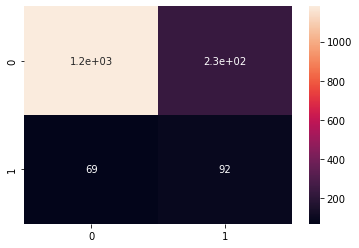

In [48]:
sns.heatmap(metrics.confusion_matrix(Y_pred,Y_test) , annot = True)
plt.show()

In [49]:
print(metrics.classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1412
           1       0.28      0.57      0.38       161

    accuracy                           0.81      1573
   macro avg       0.61      0.70      0.63      1573
weighted avg       0.88      0.81      0.83      1573



Training Accuracy

In [50]:
Y_pred = lg.predict(X_train)
metrics.accuracy_score(Y_pred,Y_train)

0.8281125775162983

Create a Decision Tree model and Random Forest model from the above-given
dataset that can predict the Exited. Print the training accuracy, testing accuracy,
classification report, and heatmap of the confusion matrix for the Decision Tree and
Random Forest model. Count how many data points are the same predicted by the
Random Forest and the Decision tree model on the test dataset.

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , Y_train)

DecisionTreeClassifier()

In [52]:
# testing
Y_pred = DT.predict(X_test)
metrics.accuracy_score(Y_pred,Y_test)

0.77177368086459

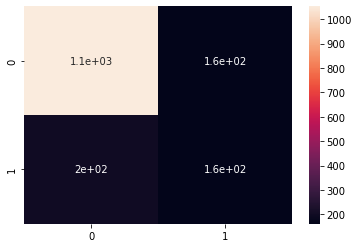

In [53]:
sns.heatmap(metrics.confusion_matrix(Y_pred,Y_test) , annot = True)
plt.show()

In [54]:
Y_pred = lg.predict(X_train)
metrics.accuracy_score(Y_pred,Y_train)

0.8281125775162983

In [55]:
# training
Y_pred = DT.predict(X_train)
metrics.accuracy_score(Y_pred,Y_train)

1.0

In [56]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


With the help of the Question 8 Logistic Regression model, Create a function that can
take these inputs - RowNumber, CustomerId, Surname, CreditScore, Geography,
Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, and IsActiveMember,
Estimated Salary as parameters and return output as Exited.
Test your function on the parameter values RowNumber - 25, CustomerId -
63445678, Surname - Lokal, CreditScore - 589, Geography - France, Gender -
Female, Age - 49, Tenure - 2, Balance - 34567.16, NumOfProducts - 1, HasCrCard -
0, IsActiveMember-1, Estimated Salary - 124345.65.

In [57]:
def prediction(RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,
              NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary):
    dic = {
        'RowNumber':RowNumber,'CustomerId':CustomerId,'Surname':Surname,'CreditScore':CreditScore,
        'Geography':Geography,'Gender':Gender,'Age':Age,'Tenure':Tenure,'Balance':Balance,
        'NumOfProducts':NumOfProducts,'HasCrCard':HasCrCard,'IsActiveMember':IsActiveMember,
        'Estimated Salary':EstimatedSalary
    }
    df = pd.DataFrame(dic , index = [1])
    
    df = df.drop(["RowNumber","CustomerId","Surname"] , axis = 1)
    if Geography=="France":
        Geography_Spain = 0
        Geography_Germany = 0
    elif Geography=="Germany":
        Geography_Spain = 0
        Geography_Germany = 1
    elif Geography=="Spain":
        Geography_Spain = 1
        Geography_Germany = 0
    if Gender == "Male":
        Gender_Male = 1
    else:
        Gender_Male = 0
    df["Geography_Spain"] = Geography_Spain
    df["Geography_Germany"] = Geography_Germany
    df["Gender_Male"] = Gender_Male
    df = df.drop(["Geography","Gender"] , axis = 1)
    df = sc.transform(df)
    pred = lg.predict(df)
    return pred
    

In [58]:
prediction(25,63445678,"Lokal","589","France","Female",49,2,34567,1,0,-1,124345.65)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Estimated Salary
Feature names seen at fit time, yet now missing:
- EstimatedSalary

  warnings.warn(message, FutureWarning)


array([1], dtype=int64)

Choose the best threshold from the list [0.4, 0.5, 0.6, 0.7,0.75] for the logistic
regression model. Here best threshold means where the training accuracy is highest.
Print the test accuracy for the test dataset on that best threshold.


In [59]:
Y_pred_proba = lg.predict_proba(X_train)[::,1]

In [60]:
Y_pred_proba

array([0.30141408, 0.22850769, 0.01386839, ..., 0.20896405, 0.21643775,
       0.05968161])

In [61]:
Y = Y_train.copy()
Y["Actual"] = Y_pred_proba
Y.head()

,Exited,Actual
7376,0,0.301414
6793,0,0.228508
447,0,0.013868
7624,0,0.037917
3109,0,0.051157


In [62]:
accuracy = []
value = []
for i in [0.4,0.5,0.6,0.7,0.75]:
    Y["Pred"+str(i)] = np.where(Y["Actual"]>=i,1,0)
    accuracy.append(metrics.accuracy_score(Y["Exited"].values.ravel(),Y["Pred"+str(i)].values.ravel()))
    value.append(i)
            
    

In [63]:
Y.head()

,Exited,Actual,Pred0.4,Pred0.5,Pred0.6,Pred0.7,Pred0.75
7376,0,0.301414,0,0,0,0,0
6793,0,0.228508,0,0,0,0,0
447,0,0.013868,0,0,0,0,0
7624,0,0.037917,0,0,0,0,0
3109,0,0.051157,0,0,0,0,0


In [64]:
accuracy

[0.8192081411989187,
 0.8281125775162983,
 0.8289076164732072,
 0.8142788996660837,
 0.8080775958021943]

In [65]:
value[accuracy.index(max(accuracy))]

0.6

In [66]:
Y_t = Y_test.copy()
Y_pred_proba = lg.predict_proba(X_test)[::,1]
Y_t["Actual"] = Y_pred_proba
Y_t.head()

,Exited,Actual
1288,1,0.410321
1455,1,0.177270
2681,0,0.144505
1118,0,0.043344
5674,0,0.151950


In [67]:
Y["Pred"] = np.where(Y["Actual"]>=i,1,0)
metrics.accuracy_score(Y["Exited"].values.ravel(),Y["Pred"].values.ravel())

0.8080775958021943

In [68]:
# random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_13384\775087939.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)


RandomForestClassifier()

In [69]:
# testing
Y_pred = RF.predict(X_test)
metrics.accuracy_score(Y_pred,Y_test)

0.8569612205975843

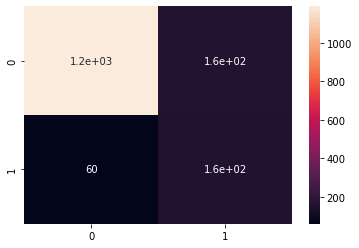

In [70]:
sns.heatmap(metrics.confusion_matrix(Y_pred,Y_test) , annot = True)
plt.show()

In [71]:
print(metrics.classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1354
           1       0.49      0.73      0.59       219

    accuracy                           0.86      1573
   macro avg       0.72      0.80      0.75      1573
weighted avg       0.89      0.86      0.87      1573



In [72]:
# training
Y_pred = RF.predict(X_train)
metrics.accuracy_score(Y_pred,Y_train)

1.0

12. Perform PCA with n_components = 2 on the given dataset and then build the logistic
regression model that can predict the Exited.


In [73]:
X = df.drop(["Exited"] , axis = 1)
Y = df[["Exited"]]

In [74]:
from sklearn.decomposition import PCA
pca = PCA(2)
PC = pca.fit_transform(X)

In [75]:
PC

array([[-76289.66245973,  -6525.08260857],
       [  8107.02384541, -11649.10816087],
       [ 83862.79179548,  -7567.28488324],
       ...,
       [ 31224.77707642, -80664.64897277],
       [-72066.71543365, -64962.63781521],
       [-76712.41911878,   -674.9375148 ]])

In [76]:
df1 = pd.DataFrame(PC , columns = ["PC1","PC2"])
df1["Exited"] = df[["Exited"]].values

In [77]:
df1

,PC1,PC2,Exited
0,-76289.662460,-6525.082609,1
1,8107.023845,-11649.108161,0
2,83862.791795,-7567.284883,1
3,-76831.837724,977.602134,0
4,47289.958125,24728.143251,0
...,...,...,...
7857,25569.037159,-21970.467014,0
7858,49468.510674,23372.250511,1
7859,31224.777076,-80664.648973,0
7860,-72066.715434,-64962.637815,0


In [78]:
X = df1.drop(["Exited"],axis = 1)
Y = df1[["Exited"]]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                random_state = 42)

In [80]:
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression()
lg.fit(X_train , Y_train)


C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [81]:
Y_pred = lg.predict(X_test)
metrics.accuracy_score(Y_pred,Y_test)

0.5003178639542276

In [82]:
X = df.drop(["Exited"],axis = 1)
Y = df[["Exited"]]

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                random_state = 42)

Hari took all three models Logistic Regression, Decision Tree, and Random Forest
and he created a new model. The new model’s logic is simple: if any two models
predict 1 as Exited their output will be 1. if any two models predict 0 as Exited their
output will be 0 If all predict 0 as Exited the output will be 0 and if all predict 1 as
Exited their output will be 1. Print the classification report for Hari’s New Model on the
test dataset

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression()
lg.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [86]:
Y_pred_l = lg.predict(X_test)
Y_pred_D = DT.predict(X_test)
Y_pred_R = RF.predict(X_test)

In [87]:
final_pred = []
for i,j,k in zip(Y_pred_l,Y_pred_D,Y_pred_R):
    if list((i,j,k)).count(1)>=2:
        final_pred.append(1)
    else:
        final_pred.append(0)
metrics.accuracy_score(final_pred,Y_test)
        

0.8493324856961221

In [88]:
dfff = pd.DataFrame(columns = [['Y_pred_l','Y_pred_D','Y_pred_R']])

In [89]:
dfff

,Y_pred_l,Y_pred_D,Y_pred_R


In [90]:
dfff["Y_pred_l"]=Y_pred_l
dfff["Y_pred_D"]=Y_pred_D
dfff["Y_pred_R"]=Y_pred_R
dfff["final_pred"] = final_pred


In [91]:
dfff

,Y_pred_l,Y_pred_D,Y_pred_R,final_pred
0,0,1,1,1
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1568,1,0,0,0
1569,0,0,0,0
1570,0,0,0,0
1571,0,0,0,0
